# Military Spending DataSet from Kaggle

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
style.use('bmh')

In [2]:
ONE_BILLION = 1e09

In [3]:
kaggle_file = './data/Military_Expenditure.csv'
df = pd.read_csv(kaggle_file, index_col='Name')

In [4]:
df.head()

,Code,Type,Indicator Name,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,AFG,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
Angola,AGO,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
Albania,ALB,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
Andorra,AND,Country,Military expenditure (current USD),NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df['Type'].value_counts()

Country                           202
Regions Clubbed Economically       33
Semi Autonomous Region             18
Regions Clubbed Geographically     11
Name: Type, dtype: int64

In [6]:
df =df[df['Type'] == 'Country']
df.head()
expenditures = df.drop(['Code','Type', 'Indicator Name'], axis=1)
expenditures.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Name,,,,,,,,,,,,,,,,,,,,,
Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.518695e+08,2.981469e+08,3.258070e+08,2.385834e+08,2.171941e+08,2.682271e+08,1.995186e+08,1.858783e+08,1.914071e+08,1.980863e+08
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.311193e+09,3.500795e+09,3.639496e+09,4.144635e+09,6.090752e+09,6.841864e+09,3.608299e+09,2.764055e+09,3.062873e+09,1.983614e+09
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.827369e+08,1.858932e+08,1.970068e+08,1.832047e+08,1.800155e+08,1.781204e+08,1.323507e+08,1.308532e+08,1.443827e+08,1.804887e+08
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
expenditures.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, Aruba to Zimbabwe
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1960    65 non-null     float64
 1   1961    70 non-null     float64
 2   1962    75 non-null     float64
 3   1963    77 non-null     float64
 4   1964    77 non-null     float64
 5   1965    81 non-null     float64
 6   1966    81 non-null     float64
 7   1967    82 non-null     float64
 8   1968    89 non-null     float64
 9   1969    89 non-null     float64
 10  1970    95 non-null     float64
 11  1971    97 non-null     float64
 12  1972    98 non-null     float64
 13  1973    102 non-null    float64
 14  1974    100 non-null    float64
 15  1975    100 non-null    float64
 16  1976    103 non-null    float64
 17  1977    108 non-null    float64
 18  1978    108 non-null    float64
 19  1979    110 non-null    float64
 20  1980    111 non-null    float64
 21  1981    113 non-null    float64
 22

In [8]:
expenditures.shape

(202, 59)

In [9]:
expenditures = (expenditures.fillna(0) / ONE_BILLION).T
expenditures.index = expenditures.index.astype(int)
expenditures.head()

Name,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,...,St. Vincent and the Grenadines,Venezuela,Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1960,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.45976,...,0.0,0.234358,0.0,0.0,0.0,0.0,0.0,0.07000,0.0,0.0
1961,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.47096,...,0.0,0.114633,0.0,0.0,0.0,0.0,0.0,0.11375,0.0,0.0
1962,0.0,0.0,0.0,0.0,0.0,0.0,0.305162,0.0,0.0,0.48944,...,0.0,0.203901,0.0,0.0,0.0,0.0,0.0,0.18620,0.0,0.0
1963,0.0,0.0,0.0,0.0,0.0,0.0,0.242220,0.0,0.0,0.55328,...,0.0,0.245397,0.0,0.0,0.0,0.0,0.0,0.18900,0.0,0.0
1964,0.0,0.0,0.0,0.0,0.0,0.0,0.245740,0.0,0.0,0.65576,...,0.0,0.200460,0.0,0.0,0.0,0.0,0.0,0.27160,0.0,0.0


In [10]:
print(list(expenditures.columns))

['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas', 'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan', 'Botswana', 'Central African Republic', 'Canada', 'Switzerland', 'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba', 'Curacao', 'Cyprus', 'Czech Republic', 'Germany', 'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia', 'Finland', 'Fiji', 'France', 'Micronesia', 'Gabon', 'United Kingdom', 'Georgia', 'Ghana', 'Gibraltar', 'Guinea', 'Gambia', 'Guinea-Bissau', 'Equatorial Guinea', 'Greece', 'Grenada', 'Greenland', 'Guatemala', 'Guam', 'Guyana', 'Hon

## Plot Military Expenditures Post Cold War

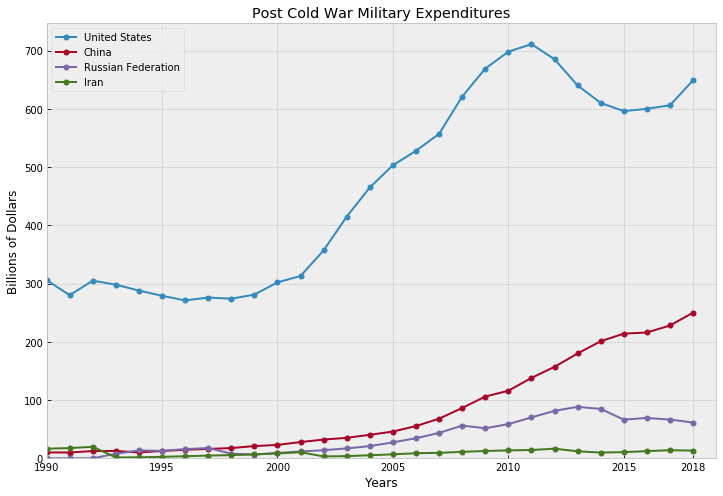

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
end_cold_war = 1990
years = expenditures.index >= end_cold_war
end_cold_war_expenditures = expenditures[years]
years = expenditures.index[years]

countries = ['United States', 'China', 'Russian Federation', 'Iran']
for country  in countries:    
    plt.plot(years, end_cold_war_expenditures[country], marker='o',markersize=5, label=country)

# Let's make sure the last year is labeled on the xaxis
# We can use this to get rid of the legend and label the lines directly
last_year = years[-1]
xticks = ax.get_xticks()
xticks = np.append(xticks[:-1],last_year)
ax.set_xticks(xticks)
ax.set_xlim(end_cold_war, last_year+1)

max_expenditures = max(end_cold_war_expenditures.max(axis=1))  
ax.set_ylim(0, 1.05 * max_expenditures)

ax.set_title('Post Cold War Military Expenditures')
ax.set_xlabel('Years')
ax.set_ylabel('Billions of Dollars');
ax.legend(loc='upper left');

### Top Ten Spenders for Various years

In [12]:
year=1990
expenditures.T.sort_values(by=year, ascending=False)[year].head(10)

Name
United States     306.000000
France             42.589869
Germany            42.318768
United Kingdom     38.943796
Japan              28.800452
Italy              20.734626
Iran               16.474402
Saudi Arabia       16.355467
Spain              11.695039
Canada             11.414632
Name: 1990, dtype: float64

In [13]:
year=2018
expenditures.T.sort_values(by=year, ascending=False)[year].head(10)

Name
United States         649.000000
China                 250.000000
Saudi Arabia           67.554667
India                  66.510289
France                 63.799677
Russian Federation     61.387547
United Kingdom         49.997193
Germany                49.470628
Japan                  46.617955
South Korea            43.069973
Name: 2018, dtype: float64